<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/12thWeekTask/TensorFlow_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [2]:
# Load CIFAR-10 Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [3]:
# Function to Build CNN Model
def build_model(kernel_size, pooling_type, optimizer_type):
    model = models.Sequential([
        layers.Conv2D(32, kernel_size, activation='relu', padding='same', input_shape=(32, 32, 3)),
        pooling_type((2, 2)),
        layers.Conv2D(64, kernel_size, activation='relu', padding='same'),
        pooling_type((2, 2)),
        layers.Conv2D(64, kernel_size, activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer_type,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [4]:
# Parameters to Compare
kernel_sizes = [(3, 3), (5, 5)]
pooling_types = [layers.MaxPooling2D, layers.AveragePooling2D]
optimizers_to_compare = [optimizers.SGD, optimizers.RMSprop, optimizers.Adam]
epochs_list = [5, 20]  # Kurangi jumlah epoch untuk mempercepat pelatihan

In [5]:
# Callback for Early Stopping and Learning Rate Scheduler
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
]

Training with kernel_size=(3, 3), pooling_type=MaxPooling2D, optimizer=SGD, epochs=5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1563/1563 - 10s - 7ms/step - accuracy: 0.2861 - loss: 1.9754 - val_accuracy: 0.2648 - val_loss: 2.0833 - learning_rate: 0.0100
Epoch 2/5
1563/1563 - 4s - 2ms/step - accuracy: 0.4367 - loss: 1.5647 - val_accuracy: 0.4597 - val_loss: 1.4949 - learning_rate: 0.0100
Epoch 3/5
1563/1563 - 6s - 4ms/step - accuracy: 0.5030 - loss: 1.3958 - val_accuracy: 0.4900 - val_loss: 1.4362 - learning_rate: 0.0100
Epoch 4/5
1563/1563 - 4s - 3ms/step - accuracy: 0.5530 - loss: 1.2654 - val_accuracy: 0.5685 - val_loss: 1.2004 - learning_rate: 0.0100
Epoch 5/5
1563/1563 - 5s - 3ms/step - accuracy: 0.5911 - loss: 1.1670 - val_accuracy: 0.5699 - val_loss: 1.2451 - learning_rate: 0.0100
Test accuracy: 0.5685


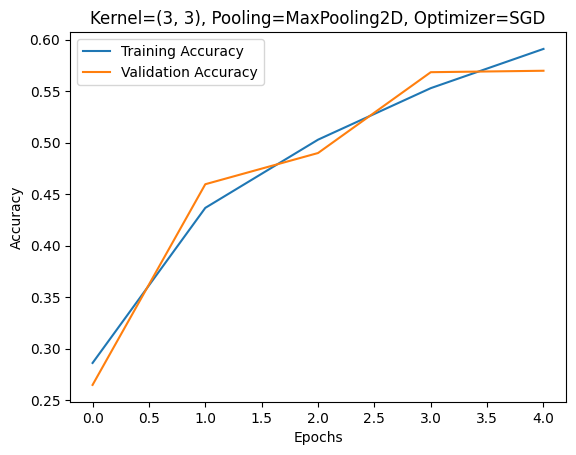

Training with kernel_size=(3, 3), pooling_type=MaxPooling2D, optimizer=SGD, epochs=20
Epoch 1/20
1563/1563 - 6s - 4ms/step - accuracy: 0.2876 - loss: 1.9711 - val_accuracy: 0.3605 - val_loss: 1.7471 - learning_rate: 0.0100
Epoch 2/20
1563/1563 - 9s - 5ms/step - accuracy: 0.4371 - loss: 1.5728 - val_accuracy: 0.4682 - val_loss: 1.4795 - learning_rate: 0.0100
Epoch 3/20
1563/1563 - 4s - 3ms/step - accuracy: 0.5014 - loss: 1.3968 - val_accuracy: 0.4841 - val_loss: 1.4510 - learning_rate: 0.0100
Epoch 4/20
1563/1563 - 7s - 4ms/step - accuracy: 0.5490 - loss: 1.2730 - val_accuracy: 0.5421 - val_loss: 1.2748 - learning_rate: 0.0100
Epoch 5/20
1563/1563 - 4s - 2ms/step - accuracy: 0.5854 - loss: 1.1765 - val_accuracy: 0.5850 - val_loss: 1.1644 - learning_rate: 0.0100
Epoch 6/20
1563/1563 - 4s - 2ms/step - accuracy: 0.6166 - loss: 1.0957 - val_accuracy: 0.5866 - val_loss: 1.1736 - learning_rate: 0.0100
Epoch 7/20
1563/1563 - 6s - 4ms/step - accuracy: 0.6447 - loss: 1.0193 - val_accuracy: 0.605

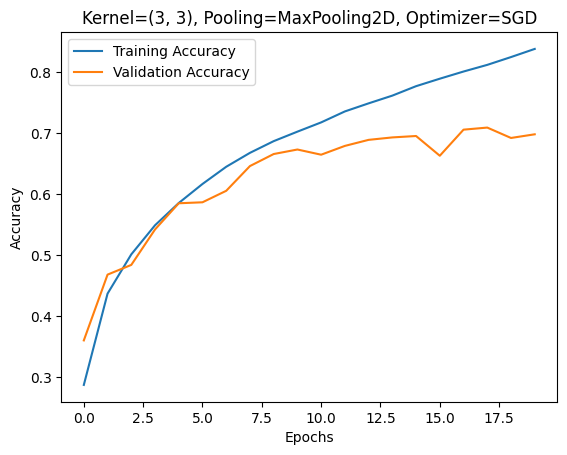

Training with kernel_size=(3, 3), pooling_type=MaxPooling2D, optimizer=RMSprop, epochs=5
Epoch 1/5
1563/1563 - 7s - 5ms/step - accuracy: 0.4665 - loss: 1.4786 - val_accuracy: 0.5581 - val_loss: 1.2545 - learning_rate: 0.0010
Epoch 2/5
1563/1563 - 8s - 5ms/step - accuracy: 0.6447 - loss: 1.0125 - val_accuracy: 0.6739 - val_loss: 0.9144 - learning_rate: 0.0010
Epoch 3/5
1563/1563 - 4s - 3ms/step - accuracy: 0.7097 - loss: 0.8376 - val_accuracy: 0.6947 - val_loss: 0.8799 - learning_rate: 0.0010
Epoch 4/5
1563/1563 - 5s - 3ms/step - accuracy: 0.7499 - loss: 0.7265 - val_accuracy: 0.7022 - val_loss: 0.8830 - learning_rate: 0.0010
Epoch 5/5
1563/1563 - 4s - 3ms/step - accuracy: 0.7811 - loss: 0.6383 - val_accuracy: 0.7168 - val_loss: 0.8722 - learning_rate: 0.0010
Test accuracy: 0.7168


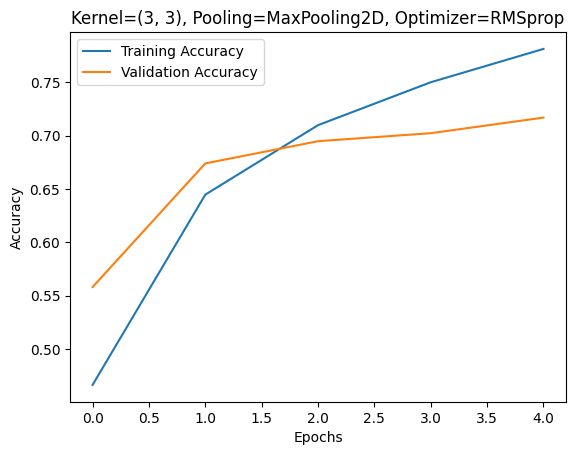

Training with kernel_size=(3, 3), pooling_type=MaxPooling2D, optimizer=RMSprop, epochs=20
Epoch 1/20
1563/1563 - 8s - 5ms/step - accuracy: 0.4812 - loss: 1.4445 - val_accuracy: 0.6000 - val_loss: 1.1478 - learning_rate: 0.0010
Epoch 2/20
1563/1563 - 7s - 4ms/step - accuracy: 0.6518 - loss: 0.9887 - val_accuracy: 0.6582 - val_loss: 0.9919 - learning_rate: 0.0010
Epoch 3/20
1563/1563 - 4s - 3ms/step - accuracy: 0.7136 - loss: 0.8215 - val_accuracy: 0.6886 - val_loss: 0.8940 - learning_rate: 0.0010
Epoch 4/20
1563/1563 - 4s - 2ms/step - accuracy: 0.7546 - loss: 0.7104 - val_accuracy: 0.7145 - val_loss: 0.8578 - learning_rate: 0.0010
Epoch 5/20
1563/1563 - 4s - 2ms/step - accuracy: 0.7844 - loss: 0.6224 - val_accuracy: 0.6779 - val_loss: 1.0111 - learning_rate: 0.0010
Epoch 6/20
1563/1563 - 5s - 3ms/step - accuracy: 0.8106 - loss: 0.5485 - val_accuracy: 0.7366 - val_loss: 0.8408 - learning_rate: 0.0010
Epoch 7/20
1563/1563 - 4s - 2ms/step - accuracy: 0.8331 - loss: 0.4831 - val_accuracy: 0

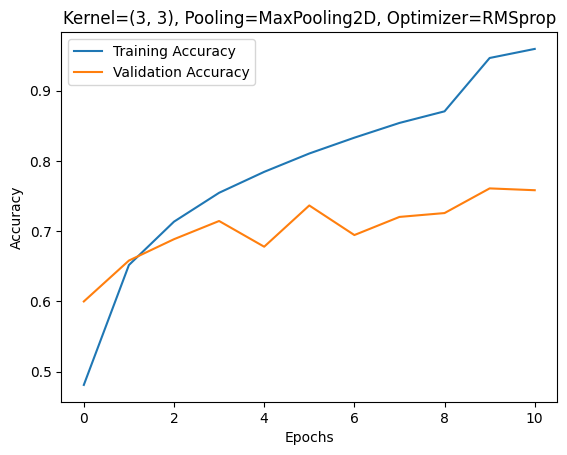

Training with kernel_size=(3, 3), pooling_type=MaxPooling2D, optimizer=Adam, epochs=5
Epoch 1/5
1563/1563 - 8s - 5ms/step - accuracy: 0.4773 - loss: 1.4496 - val_accuracy: 0.5707 - val_loss: 1.1829 - learning_rate: 0.0010
Epoch 2/5
1563/1563 - 7s - 5ms/step - accuracy: 0.6416 - loss: 1.0200 - val_accuracy: 0.6765 - val_loss: 0.9233 - learning_rate: 0.0010
Epoch 3/5
1563/1563 - 5s - 3ms/step - accuracy: 0.7026 - loss: 0.8503 - val_accuracy: 0.7020 - val_loss: 0.8449 - learning_rate: 0.0010
Epoch 4/5
1563/1563 - 4s - 3ms/step - accuracy: 0.7401 - loss: 0.7467 - val_accuracy: 0.7238 - val_loss: 0.8027 - learning_rate: 0.0010
Epoch 5/5
1563/1563 - 5s - 3ms/step - accuracy: 0.7652 - loss: 0.6701 - val_accuracy: 0.7184 - val_loss: 0.8317 - learning_rate: 0.0010
Test accuracy: 0.7238


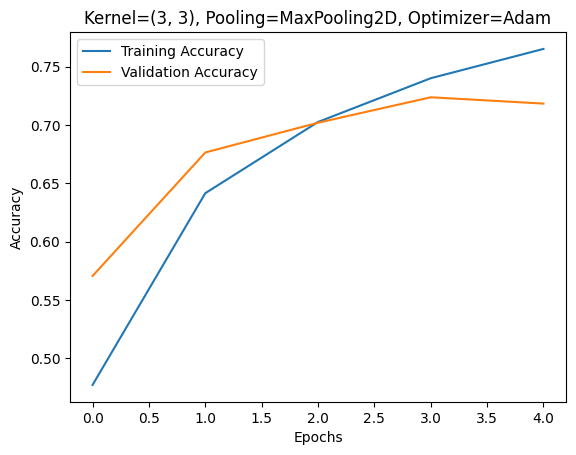

Training with kernel_size=(3, 3), pooling_type=MaxPooling2D, optimizer=Adam, epochs=20
Epoch 1/20
1563/1563 - 8s - 5ms/step - accuracy: 0.4829 - loss: 1.4330 - val_accuracy: 0.6049 - val_loss: 1.1185 - learning_rate: 0.0010
Epoch 2/20
1563/1563 - 4s - 3ms/step - accuracy: 0.6424 - loss: 1.0069 - val_accuracy: 0.6464 - val_loss: 1.0279 - learning_rate: 0.0010
Epoch 3/20
1563/1563 - 5s - 3ms/step - accuracy: 0.7033 - loss: 0.8466 - val_accuracy: 0.7024 - val_loss: 0.8637 - learning_rate: 0.0010
Epoch 4/20
1563/1563 - 4s - 3ms/step - accuracy: 0.7383 - loss: 0.7482 - val_accuracy: 0.7098 - val_loss: 0.8251 - learning_rate: 0.0010
Epoch 5/20
1563/1563 - 5s - 3ms/step - accuracy: 0.7674 - loss: 0.6645 - val_accuracy: 0.7113 - val_loss: 0.8318 - learning_rate: 0.0010
Test accuracy: 0.6049


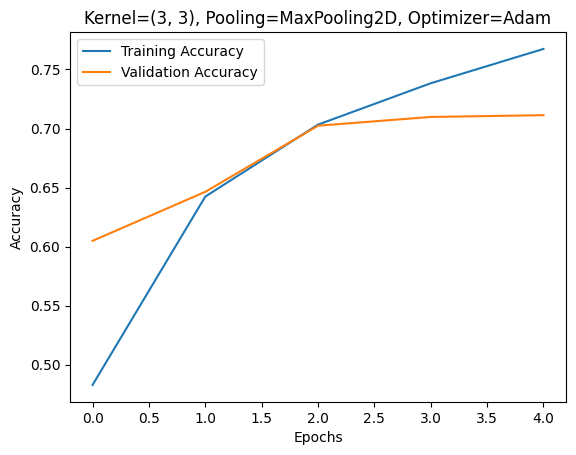

Training with kernel_size=(3, 3), pooling_type=AveragePooling2D, optimizer=SGD, epochs=5
Epoch 1/5
1563/1563 - 7s - 5ms/step - accuracy: 0.2877 - loss: 1.9669 - val_accuracy: 0.3883 - val_loss: 1.7369 - learning_rate: 0.0100
Epoch 2/5
1563/1563 - 4s - 3ms/step - accuracy: 0.4074 - loss: 1.6627 - val_accuracy: 0.4428 - val_loss: 1.5589 - learning_rate: 0.0100
Epoch 3/5
1563/1563 - 5s - 3ms/step - accuracy: 0.4635 - loss: 1.5088 - val_accuracy: 0.4879 - val_loss: 1.4467 - learning_rate: 0.0100
Epoch 4/5
1563/1563 - 3s - 2ms/step - accuracy: 0.5006 - loss: 1.4069 - val_accuracy: 0.5096 - val_loss: 1.3634 - learning_rate: 0.0100
Epoch 5/5
1563/1563 - 5s - 3ms/step - accuracy: 0.5256 - loss: 1.3342 - val_accuracy: 0.4758 - val_loss: 1.4348 - learning_rate: 0.0100
Test accuracy: 0.3883


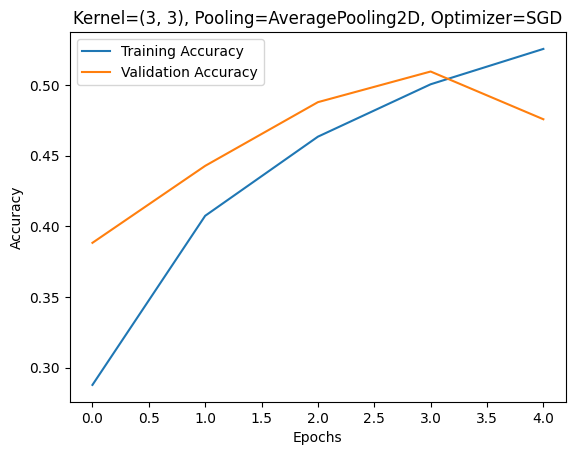

Training with kernel_size=(3, 3), pooling_type=AveragePooling2D, optimizer=SGD, epochs=20
Epoch 1/20
1563/1563 - 7s - 4ms/step - accuracy: 0.2613 - loss: 2.0396 - val_accuracy: 0.3524 - val_loss: 1.8059 - learning_rate: 0.0100
Epoch 2/20
1563/1563 - 7s - 5ms/step - accuracy: 0.4022 - loss: 1.6794 - val_accuracy: 0.3901 - val_loss: 1.7256 - learning_rate: 0.0100
Epoch 3/20
1563/1563 - 4s - 3ms/step - accuracy: 0.4630 - loss: 1.5083 - val_accuracy: 0.4845 - val_loss: 1.4538 - learning_rate: 0.0100
Epoch 4/20
1563/1563 - 4s - 3ms/step - accuracy: 0.4989 - loss: 1.4131 - val_accuracy: 0.4851 - val_loss: 1.4347 - learning_rate: 0.0100
Epoch 5/20
1563/1563 - 5s - 3ms/step - accuracy: 0.5215 - loss: 1.3423 - val_accuracy: 0.5260 - val_loss: 1.3317 - learning_rate: 0.0100
Test accuracy: 0.3524


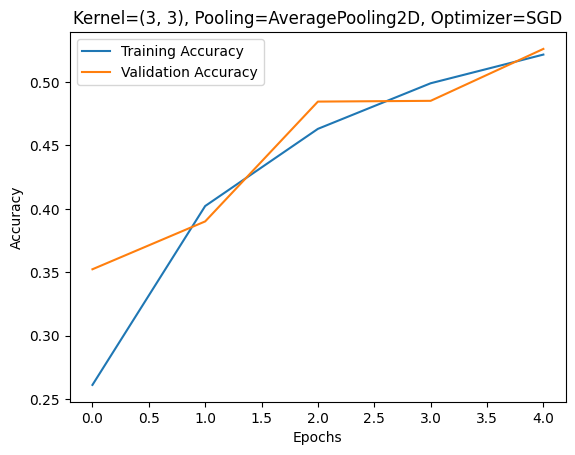

Training with kernel_size=(3, 3), pooling_type=AveragePooling2D, optimizer=RMSprop, epochs=5
Epoch 1/5
1563/1563 - 7s - 5ms/step - accuracy: 0.4450 - loss: 1.5448 - val_accuracy: 0.5511 - val_loss: 1.2390 - learning_rate: 0.0010
Epoch 2/5
1563/1563 - 4s - 3ms/step - accuracy: 0.5997 - loss: 1.1328 - val_accuracy: 0.6401 - val_loss: 1.0129 - learning_rate: 0.0010
Epoch 3/5
1563/1563 - 4s - 2ms/step - accuracy: 0.6694 - loss: 0.9453 - val_accuracy: 0.6531 - val_loss: 0.9870 - learning_rate: 0.0010
Epoch 4/5
1563/1563 - 3s - 2ms/step - accuracy: 0.7135 - loss: 0.8266 - val_accuracy: 0.6909 - val_loss: 0.8865 - learning_rate: 0.0010
Epoch 5/5
1563/1563 - 4s - 3ms/step - accuracy: 0.7449 - loss: 0.7378 - val_accuracy: 0.6624 - val_loss: 1.0595 - learning_rate: 0.0010
Test accuracy: 0.5511


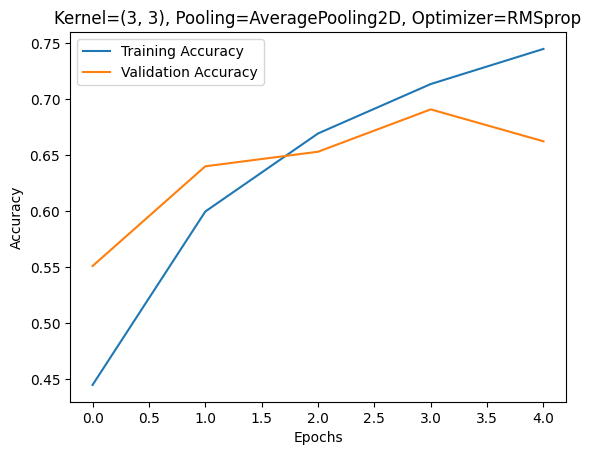

Training with kernel_size=(3, 3), pooling_type=AveragePooling2D, optimizer=RMSprop, epochs=20
Epoch 1/20
1563/1563 - 7s - 5ms/step - accuracy: 0.4390 - loss: 1.5583 - val_accuracy: 0.5370 - val_loss: 1.2807 - learning_rate: 0.0010
Epoch 2/20
1563/1563 - 5s - 3ms/step - accuracy: 0.5995 - loss: 1.1372 - val_accuracy: 0.6223 - val_loss: 1.0614 - learning_rate: 0.0010
Epoch 3/20
1563/1563 - 4s - 3ms/step - accuracy: 0.6714 - loss: 0.9467 - val_accuracy: 0.6754 - val_loss: 0.9560 - learning_rate: 0.0010
Epoch 4/20
1563/1563 - 7s - 4ms/step - accuracy: 0.7139 - loss: 0.8223 - val_accuracy: 0.6851 - val_loss: 0.9064 - learning_rate: 0.0010
Epoch 5/20
1563/1563 - 9s - 6ms/step - accuracy: 0.7455 - loss: 0.7291 - val_accuracy: 0.6932 - val_loss: 0.9222 - learning_rate: 0.0010
Test accuracy: 0.5370


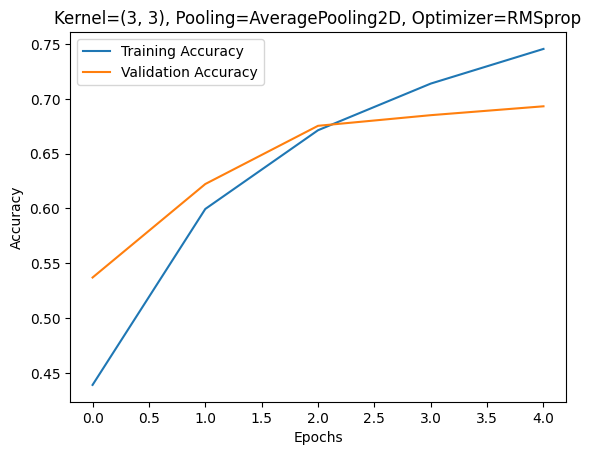

Training with kernel_size=(3, 3), pooling_type=AveragePooling2D, optimizer=Adam, epochs=5
Epoch 1/5
1563/1563 - 8s - 5ms/step - accuracy: 0.4470 - loss: 1.5291 - val_accuracy: 0.5261 - val_loss: 1.3234 - learning_rate: 0.0010
Epoch 2/5
1563/1563 - 4s - 3ms/step - accuracy: 0.5971 - loss: 1.1303 - val_accuracy: 0.6386 - val_loss: 1.0091 - learning_rate: 0.0010
Epoch 3/5
1563/1563 - 4s - 2ms/step - accuracy: 0.6704 - loss: 0.9417 - val_accuracy: 0.6744 - val_loss: 0.9150 - learning_rate: 0.0010
Epoch 4/5
1563/1563 - 5s - 3ms/step - accuracy: 0.7102 - loss: 0.8268 - val_accuracy: 0.6873 - val_loss: 0.8935 - learning_rate: 0.0010
Epoch 5/5
1563/1563 - 6s - 4ms/step - accuracy: 0.7390 - loss: 0.7404 - val_accuracy: 0.7003 - val_loss: 0.8607 - learning_rate: 0.0010
Test accuracy: 0.5261


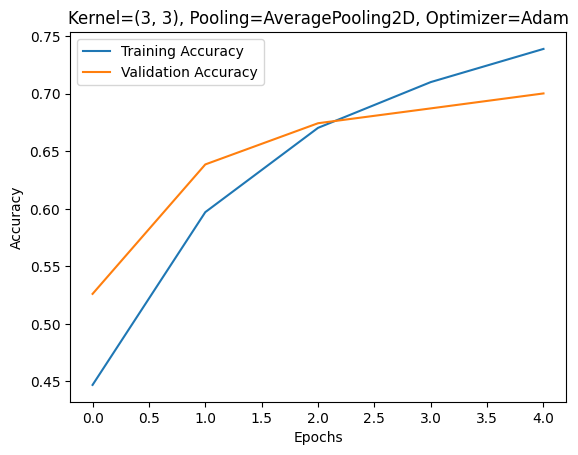

Training with kernel_size=(3, 3), pooling_type=AveragePooling2D, optimizer=Adam, epochs=20
Epoch 1/20
1563/1563 - 9s - 6ms/step - accuracy: 0.4426 - loss: 1.5364 - val_accuracy: 0.5495 - val_loss: 1.2875 - learning_rate: 0.0010
Epoch 2/20
1563/1563 - 7s - 4ms/step - accuracy: 0.5755 - loss: 1.1854 - val_accuracy: 0.5903 - val_loss: 1.1675 - learning_rate: 0.0010
Epoch 3/20
1563/1563 - 6s - 4ms/step - accuracy: 0.6440 - loss: 1.0100 - val_accuracy: 0.6480 - val_loss: 0.9852 - learning_rate: 0.0010
Epoch 4/20
1563/1563 - 5s - 3ms/step - accuracy: 0.6904 - loss: 0.8845 - val_accuracy: 0.6697 - val_loss: 0.9287 - learning_rate: 0.0010
Epoch 5/20
1563/1563 - 5s - 3ms/step - accuracy: 0.7177 - loss: 0.7980 - val_accuracy: 0.6905 - val_loss: 0.8692 - learning_rate: 0.0010
Test accuracy: 0.5495


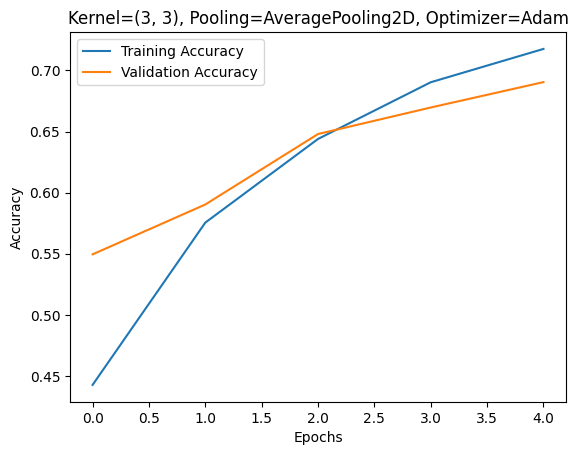

Training with kernel_size=(5, 5), pooling_type=MaxPooling2D, optimizer=SGD, epochs=5
Epoch 1/5
1563/1563 - 10s - 6ms/step - accuracy: 0.3069 - loss: 1.9102 - val_accuracy: 0.4283 - val_loss: 1.5929 - learning_rate: 0.0100
Epoch 2/5
1563/1563 - 5s - 3ms/step - accuracy: 0.4581 - loss: 1.5133 - val_accuracy: 0.4779 - val_loss: 1.4448 - learning_rate: 0.0100
Epoch 3/5
1563/1563 - 5s - 3ms/step - accuracy: 0.5264 - loss: 1.3363 - val_accuracy: 0.5496 - val_loss: 1.2692 - learning_rate: 0.0100
Epoch 4/5
1563/1563 - 5s - 3ms/step - accuracy: 0.5738 - loss: 1.2029 - val_accuracy: 0.5703 - val_loss: 1.2186 - learning_rate: 0.0100
Epoch 5/5
1563/1563 - 5s - 3ms/step - accuracy: 0.6182 - loss: 1.0860 - val_accuracy: 0.6017 - val_loss: 1.1162 - learning_rate: 0.0100
Test accuracy: 0.4283


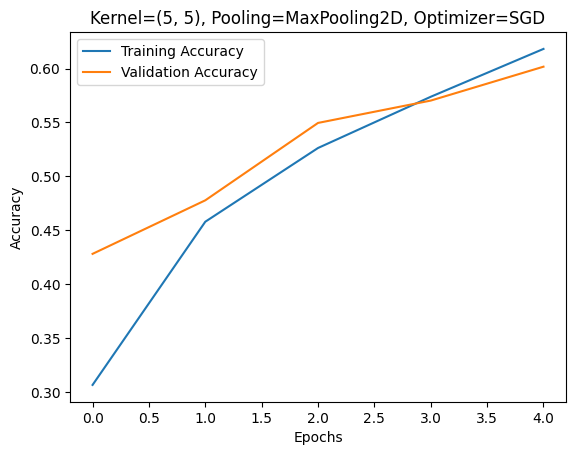

Training with kernel_size=(5, 5), pooling_type=MaxPooling2D, optimizer=SGD, epochs=20
Epoch 1/20
1563/1563 - 7s - 5ms/step - accuracy: 0.3148 - loss: 1.8971 - val_accuracy: 0.4329 - val_loss: 1.5983 - learning_rate: 0.0100
Epoch 2/20
1563/1563 - 5s - 3ms/step - accuracy: 0.4629 - loss: 1.5004 - val_accuracy: 0.5024 - val_loss: 1.3972 - learning_rate: 0.0100
Epoch 3/20
1563/1563 - 5s - 3ms/step - accuracy: 0.5289 - loss: 1.3220 - val_accuracy: 0.5029 - val_loss: 1.3802 - learning_rate: 0.0100
Epoch 4/20
1563/1563 - 5s - 3ms/step - accuracy: 0.5814 - loss: 1.1886 - val_accuracy: 0.6013 - val_loss: 1.1352 - learning_rate: 0.0100
Epoch 5/20
1563/1563 - 4s - 3ms/step - accuracy: 0.6220 - loss: 1.0757 - val_accuracy: 0.5877 - val_loss: 1.1625 - learning_rate: 0.0100
Test accuracy: 0.4329


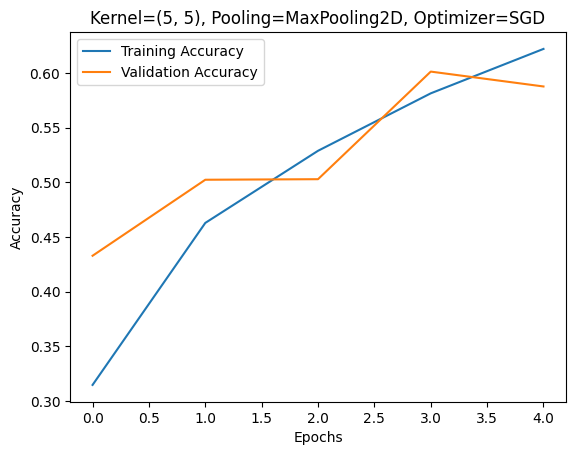

Training with kernel_size=(5, 5), pooling_type=MaxPooling2D, optimizer=RMSprop, epochs=5
Epoch 1/5
1563/1563 - 8s - 5ms/step - accuracy: 0.4491 - loss: 1.5251 - val_accuracy: 0.5702 - val_loss: 1.1984 - learning_rate: 0.0010
Epoch 2/5
1563/1563 - 5s - 3ms/step - accuracy: 0.6394 - loss: 1.0396 - val_accuracy: 0.6165 - val_loss: 1.1153 - learning_rate: 0.0010
Epoch 3/5
1563/1563 - 5s - 3ms/step - accuracy: 0.7033 - loss: 0.8631 - val_accuracy: 0.6765 - val_loss: 0.9543 - learning_rate: 0.0010
Epoch 4/5
1563/1563 - 6s - 4ms/step - accuracy: 0.7436 - loss: 0.7481 - val_accuracy: 0.6923 - val_loss: 0.9161 - learning_rate: 0.0010
Epoch 5/5
1563/1563 - 10s - 6ms/step - accuracy: 0.7765 - loss: 0.6610 - val_accuracy: 0.7032 - val_loss: 0.8969 - learning_rate: 0.0010
Test accuracy: 0.5702


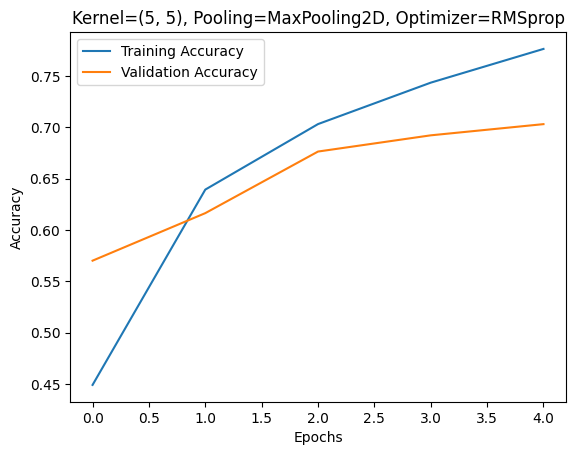

Training with kernel_size=(5, 5), pooling_type=MaxPooling2D, optimizer=RMSprop, epochs=20
Epoch 1/20
1563/1563 - 8s - 5ms/step - accuracy: 0.4456 - loss: 1.5361 - val_accuracy: 0.5936 - val_loss: 1.1626 - learning_rate: 0.0010
Epoch 2/20
1563/1563 - 8s - 5ms/step - accuracy: 0.6294 - loss: 1.0698 - val_accuracy: 0.6603 - val_loss: 0.9812 - learning_rate: 0.0010
Epoch 3/20
1563/1563 - 5s - 3ms/step - accuracy: 0.6929 - loss: 0.8911 - val_accuracy: 0.6602 - val_loss: 0.9993 - learning_rate: 0.0010
Epoch 4/20
1563/1563 - 5s - 3ms/step - accuracy: 0.7373 - loss: 0.7704 - val_accuracy: 0.5577 - val_loss: 1.7035 - learning_rate: 0.0010
Epoch 5/20
1563/1563 - 5s - 3ms/step - accuracy: 0.7684 - loss: 0.6796 - val_accuracy: 0.7099 - val_loss: 0.8767 - learning_rate: 0.0010
Test accuracy: 0.5936


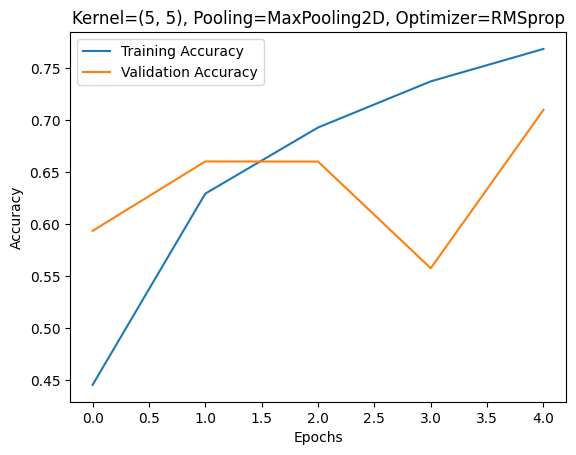

Training with kernel_size=(5, 5), pooling_type=MaxPooling2D, optimizer=Adam, epochs=5
Epoch 1/5
1563/1563 - 10s - 6ms/step - accuracy: 0.4573 - loss: 1.4852 - val_accuracy: 0.5270 - val_loss: 1.3424 - learning_rate: 0.0010
Epoch 2/5
1563/1563 - 5s - 3ms/step - accuracy: 0.6215 - loss: 1.0706 - val_accuracy: 0.6436 - val_loss: 1.0203 - learning_rate: 0.0010
Epoch 3/5
1563/1563 - 5s - 3ms/step - accuracy: 0.6848 - loss: 0.8958 - val_accuracy: 0.6732 - val_loss: 0.9277 - learning_rate: 0.0010
Epoch 4/5
1563/1563 - 5s - 3ms/step - accuracy: 0.7253 - loss: 0.7777 - val_accuracy: 0.7063 - val_loss: 0.8605 - learning_rate: 0.0010
Epoch 5/5
1563/1563 - 5s - 3ms/step - accuracy: 0.7621 - loss: 0.6761 - val_accuracy: 0.6960 - val_loss: 0.9147 - learning_rate: 0.0010
Test accuracy: 0.5270


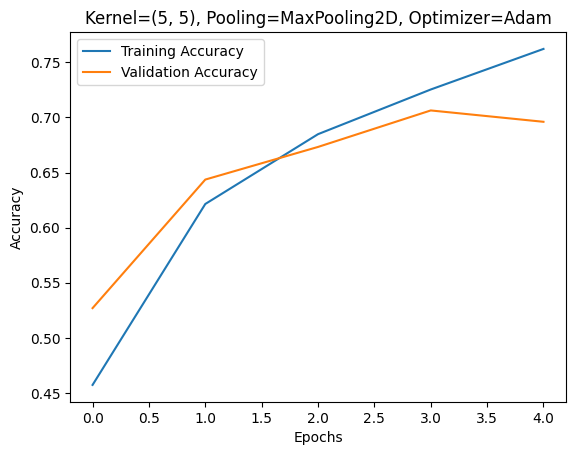

Training with kernel_size=(5, 5), pooling_type=MaxPooling2D, optimizer=Adam, epochs=20
Epoch 1/20
1563/1563 - 10s - 6ms/step - accuracy: 0.4734 - loss: 1.4614 - val_accuracy: 0.5750 - val_loss: 1.2176 - learning_rate: 0.0010
Epoch 2/20
1563/1563 - 5s - 3ms/step - accuracy: 0.6310 - loss: 1.0476 - val_accuracy: 0.6333 - val_loss: 1.0573 - learning_rate: 0.0010
Epoch 3/20
1563/1563 - 5s - 3ms/step - accuracy: 0.6940 - loss: 0.8716 - val_accuracy: 0.6846 - val_loss: 0.9013 - learning_rate: 0.0010
Epoch 4/20
1563/1563 - 5s - 3ms/step - accuracy: 0.7393 - loss: 0.7421 - val_accuracy: 0.6741 - val_loss: 0.9529 - learning_rate: 0.0010
Epoch 5/20
1563/1563 - 5s - 3ms/step - accuracy: 0.7759 - loss: 0.6392 - val_accuracy: 0.7077 - val_loss: 0.8879 - learning_rate: 0.0010
Test accuracy: 0.5750


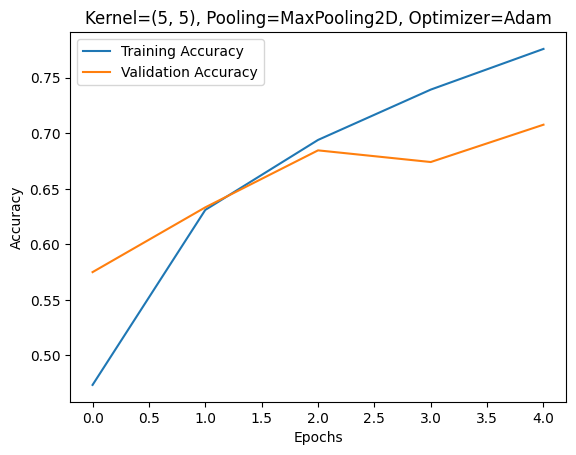

Training with kernel_size=(5, 5), pooling_type=AveragePooling2D, optimizer=SGD, epochs=5
Epoch 1/5
1563/1563 - 9s - 6ms/step - accuracy: 0.2953 - loss: 1.9455 - val_accuracy: 0.3928 - val_loss: 1.6980 - learning_rate: 0.0100
Epoch 2/5
1563/1563 - 6s - 4ms/step - accuracy: 0.4365 - loss: 1.5815 - val_accuracy: 0.4754 - val_loss: 1.4604 - learning_rate: 0.0100
Epoch 3/5
1563/1563 - 6s - 4ms/step - accuracy: 0.4914 - loss: 1.4233 - val_accuracy: 0.5157 - val_loss: 1.3649 - learning_rate: 0.0100
Epoch 4/5
1563/1563 - 9s - 6ms/step - accuracy: 0.5330 - loss: 1.3144 - val_accuracy: 0.5476 - val_loss: 1.2739 - learning_rate: 0.0100
Epoch 5/5
1563/1563 - 5s - 3ms/step - accuracy: 0.5672 - loss: 1.2300 - val_accuracy: 0.5573 - val_loss: 1.2526 - learning_rate: 0.0100
Test accuracy: 0.3928


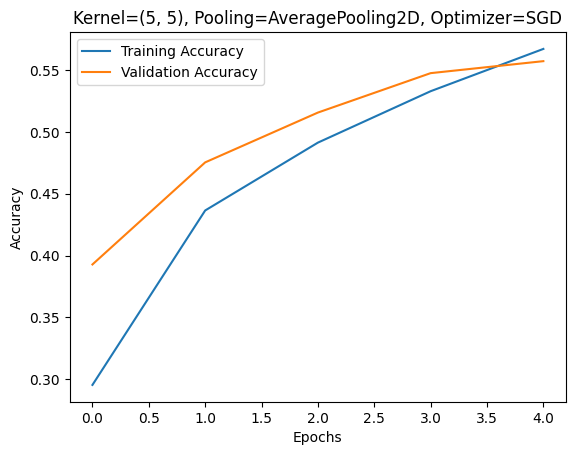

Training with kernel_size=(5, 5), pooling_type=AveragePooling2D, optimizer=SGD, epochs=20
Epoch 1/20
1563/1563 - 9s - 6ms/step - accuracy: 0.2988 - loss: 1.9286 - val_accuracy: 0.4148 - val_loss: 1.6590 - learning_rate: 0.0100
Epoch 2/20
1563/1563 - 4s - 3ms/step - accuracy: 0.4320 - loss: 1.5958 - val_accuracy: 0.4450 - val_loss: 1.5835 - learning_rate: 0.0100
Epoch 3/20
1563/1563 - 5s - 3ms/step - accuracy: 0.4864 - loss: 1.4484 - val_accuracy: 0.4791 - val_loss: 1.4577 - learning_rate: 0.0100
Epoch 4/20
1563/1563 - 6s - 4ms/step - accuracy: 0.5204 - loss: 1.3524 - val_accuracy: 0.5275 - val_loss: 1.3212 - learning_rate: 0.0100
Epoch 5/20
1563/1563 - 5s - 3ms/step - accuracy: 0.5510 - loss: 1.2690 - val_accuracy: 0.5290 - val_loss: 1.3243 - learning_rate: 0.0100
Test accuracy: 0.4148


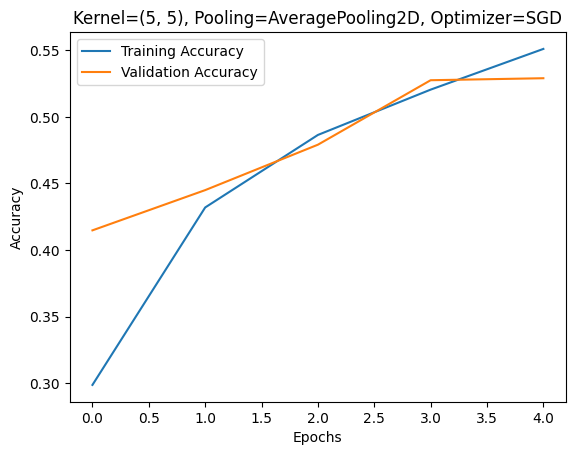

Training with kernel_size=(5, 5), pooling_type=AveragePooling2D, optimizer=RMSprop, epochs=5
Epoch 1/5
1563/1563 - 9s - 6ms/step - accuracy: 0.4366 - loss: 1.5712 - val_accuracy: 0.5487 - val_loss: 1.2606 - learning_rate: 0.0010
Epoch 2/5
1563/1563 - 7s - 5ms/step - accuracy: 0.6098 - loss: 1.1194 - val_accuracy: 0.6156 - val_loss: 1.0876 - learning_rate: 0.0010
Epoch 3/5
1563/1563 - 4s - 3ms/step - accuracy: 0.6822 - loss: 0.9193 - val_accuracy: 0.6560 - val_loss: 1.0003 - learning_rate: 0.0010
Epoch 4/5
1563/1563 - 5s - 3ms/step - accuracy: 0.7279 - loss: 0.7934 - val_accuracy: 0.6868 - val_loss: 0.9347 - learning_rate: 0.0010
Epoch 5/5
1563/1563 - 4s - 3ms/step - accuracy: 0.7628 - loss: 0.6906 - val_accuracy: 0.7009 - val_loss: 0.8933 - learning_rate: 0.0010
Test accuracy: 0.5487


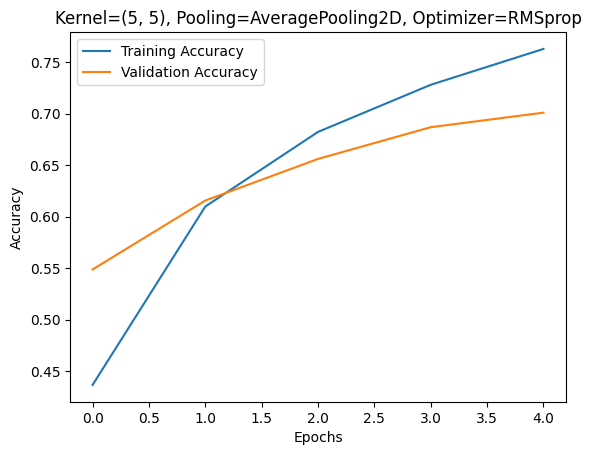

Training with kernel_size=(5, 5), pooling_type=AveragePooling2D, optimizer=RMSprop, epochs=20
Epoch 1/20
1563/1563 - 8s - 5ms/step - accuracy: 0.4224 - loss: 1.5973 - val_accuracy: 0.5396 - val_loss: 1.2859 - learning_rate: 0.0010
Epoch 2/20
1563/1563 - 7s - 5ms/step - accuracy: 0.5955 - loss: 1.1547 - val_accuracy: 0.6140 - val_loss: 1.1092 - learning_rate: 0.0010
Epoch 3/20
1563/1563 - 5s - 3ms/step - accuracy: 0.6682 - loss: 0.9550 - val_accuracy: 0.6686 - val_loss: 0.9634 - learning_rate: 0.0010
Epoch 4/20
1563/1563 - 5s - 3ms/step - accuracy: 0.7145 - loss: 0.8215 - val_accuracy: 0.6784 - val_loss: 0.9292 - learning_rate: 0.0010
Epoch 5/20
1563/1563 - 5s - 3ms/step - accuracy: 0.7517 - loss: 0.7212 - val_accuracy: 0.6865 - val_loss: 0.9315 - learning_rate: 0.0010
Test accuracy: 0.5396


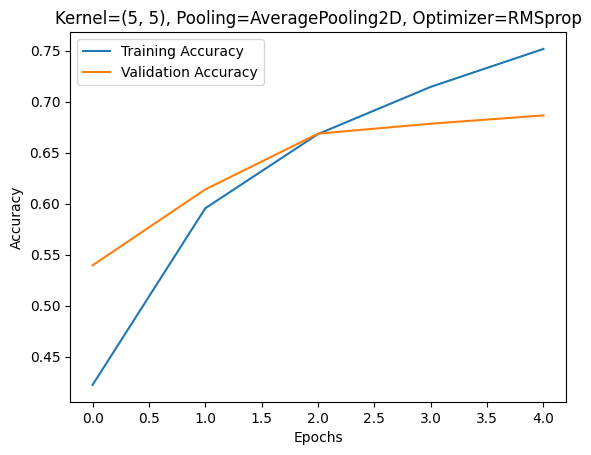

Training with kernel_size=(5, 5), pooling_type=AveragePooling2D, optimizer=Adam, epochs=5
Epoch 1/5
1563/1563 - 10s - 7ms/step - accuracy: 0.4423 - loss: 1.5401 - val_accuracy: 0.5427 - val_loss: 1.2884 - learning_rate: 0.0010
Epoch 2/5
1563/1563 - 5s - 3ms/step - accuracy: 0.6007 - loss: 1.1288 - val_accuracy: 0.5971 - val_loss: 1.1310 - learning_rate: 0.0010
Epoch 3/5
1563/1563 - 5s - 3ms/step - accuracy: 0.6697 - loss: 0.9395 - val_accuracy: 0.6714 - val_loss: 0.9456 - learning_rate: 0.0010
Epoch 4/5
1563/1563 - 6s - 4ms/step - accuracy: 0.7213 - loss: 0.8056 - val_accuracy: 0.6752 - val_loss: 0.9458 - learning_rate: 0.0010
Epoch 5/5
1563/1563 - 4s - 3ms/step - accuracy: 0.7564 - loss: 0.6986 - val_accuracy: 0.6943 - val_loss: 0.9088 - learning_rate: 0.0010
Test accuracy: 0.5427


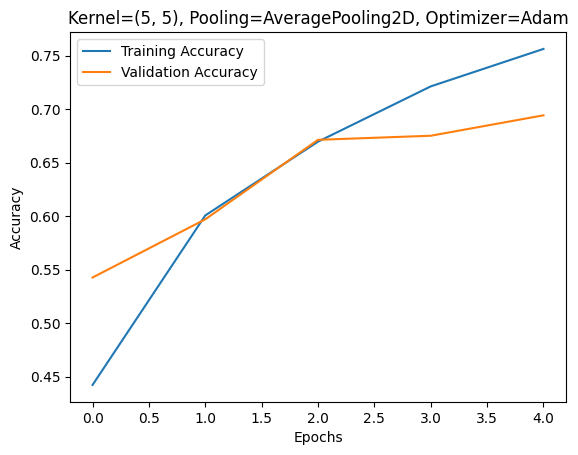

Training with kernel_size=(5, 5), pooling_type=AveragePooling2D, optimizer=Adam, epochs=20
Epoch 1/20
1563/1563 - 9s - 6ms/step - accuracy: 0.4357 - loss: 1.5567 - val_accuracy: 0.5244 - val_loss: 1.3136 - learning_rate: 0.0010
Epoch 2/20
1563/1563 - 5s - 3ms/step - accuracy: 0.5942 - loss: 1.1454 - val_accuracy: 0.6280 - val_loss: 1.0519 - learning_rate: 0.0010
Epoch 3/20
1563/1563 - 5s - 3ms/step - accuracy: 0.6683 - loss: 0.9420 - val_accuracy: 0.6602 - val_loss: 0.9721 - learning_rate: 0.0010
Epoch 4/20
1563/1563 - 5s - 3ms/step - accuracy: 0.7169 - loss: 0.8025 - val_accuracy: 0.6742 - val_loss: 0.9380 - learning_rate: 0.0010
Epoch 5/20
1563/1563 - 6s - 4ms/step - accuracy: 0.7530 - loss: 0.6977 - val_accuracy: 0.6881 - val_loss: 0.9083 - learning_rate: 0.0010
Test accuracy: 0.5244


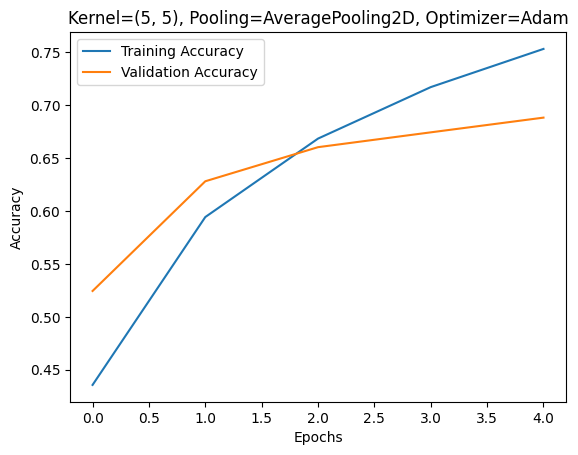

In [6]:
# Perform Comparisons
for kernel_size in kernel_sizes:
    for pooling_type in pooling_types:
        for optimizer_class in optimizers_to_compare:
            for epochs in epochs_list:
                print(f"Training with kernel_size={kernel_size}, pooling_type={pooling_type.__name__}, "
                      f"optimizer={optimizer_class.__name__}, epochs={epochs}")
                optimizer_instance = optimizer_class()  # Create a new instance of the optimizer
                model = build_model(kernel_size, pooling_type, optimizer_instance)
                history = model.fit(train_images, train_labels,
                                    epochs=epochs,
                                    validation_data=(test_images, test_labels),
                                    callbacks=callbacks,
                                    verbose=2)
                test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
                print(f"Test accuracy: {test_acc:.4f}")

                # Plot Accuracy
                plt.plot(history.history['accuracy'], label='Training Accuracy')
                plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
                plt.title(f"Kernel={kernel_size}, Pooling={pooling_type.__name__}, Optimizer={optimizer_class.__name__}")
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.show()